# tldr: In this notebook, we process data to get a class schedule in fall 2021

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
import datetime as dt

## First, get the data on class schedules

In [2]:
schedule_1 = pandas.read_excel('./AT624_CLASS_DATA_FOR_MODELING5_2.8.21_EARLY_DRAFT.xlsx', header = 1)

schedule_2 = pandas.read_excel('./FA21_AT624_CLASS_DATA_FOR_MODELING7_MMP_7.19.21[1].xlsx')

schedule_3 = pandas.read_csv('./room_assignments_August_15_draft.csv')

### schedule_1

In [14]:
schedule_1 = pandas.read_excel('./AT624_CLASS_DATA_FOR_MODELING5_2.8.21_EARLY_DRAFT.xlsx', header = 1)


In [18]:
schedule_1.head()

,Date & Time of Data Pull,Term,Session,Career,Acad Group,Acad Org,Unique Instr Entity ID,Course ID,Offer Nbr,Subject,...,Grading,20 ft Blackboard Char,Moveable Seating Room Char,PS Key,CrsAtr Val,PS Meeting Key,Class Type,Add Consent,AV Remote Access Capable Room,Final Exam
0,2021-02-08 23:12:58,2783,1,GR,AS,GOVT,2783-1-6800C,371320,1,GOVT,...,OPT,NaN,NaN,GOVT-6254-SEM-101-16731,NaN,GOVT-6254-SEM-101-16731-1,Enrollment,No Consent,NaN,N
1,2021-02-08 23:12:58,2783,1,UG,AS,ASRC,2783-1-7316C,364560,4,ASRC,...,OPT,NaN,NaN,ASRC-2688-DIS-203-20712,NaN,ASRC-2688-DIS-203-20712-1,Enrollment,Inst Cnsnt,NaN,N
2,2021-02-08 23:12:58,2783,1,UG,EN,MAE,2783-1-2680C,355233,2,MAE,...,GRD,NaN,NaN,MAE-4530-LEC-1-10779,LOCAL,MAE-4530-LEC-1-10779-1,Enrollment,No Consent,NaN,P
3,2021-02-08 23:12:58,2783,7W1,GM,BU,GM,2783-7W1-20855,368478,1,NBAT,...,GRI,NaN,NaN,NBAT-5900-LEC-1-20855,NaN,NBAT-5900-LEC-1-20855-2,Enrollment,Dept Cnsnt,NaN,U
4,2021-02-08 23:12:58,2783,7W1,GM,BU,GM,2783-7W1-20855,368478,1,NBAT,...,GRI,NaN,NaN,NBAT-5900-LEC-1-20855,NaN,NBAT-5900-LEC-1-20855-2,Enrollment,Dept Cnsnt,NaN,U


In [29]:
schedule_1_short = schedule_1[
    ['Subject', 'Catalog', 'Section', 'Class Nbr', 
     'Mtg Start Time', 'Mtg End Time', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun',
       'Meeting Days', 'Mtg Start Date', 'Mtg End Date', 'Class Cap Enrl', 'Class Tot Enrl']
]
schedule_1_short.drop_duplicates(inplace=True)

<ipython-input-29-6147a9e3d382>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schedule_1_short.drop_duplicates(inplace=True)


In [30]:
print(schedule_1_short.shape)
schedule_1_short.head()

(17012, 18)


,Subject,Catalog,Section,Class Nbr,Mtg Start Time,Mtg End Time,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,Meeting Days,Mtg Start Date,Mtg End Date,Class Cap Enrl,Class Tot Enrl
0,GOVT,6254,101,16731,09:05:00,11:00:00,N,Y,N,N,N,N,N,T,2021-02-08,2021-05-14,15,3
1,ASRC,2688,203,20712,11:20:00,12:10:00,N,N,N,N,Y,N,N,F,2021-02-08,2021-05-14,0,0
2,MAE,4530,001,10779,10:10:00,11:00:00,Y,N,Y,N,Y,N,N,MWF,2021-02-08,2021-05-14,8,0
3,NBAT,5900,001,20855,19:00:00,23:00:00,N,N,N,N,N,N,N,NaN,2021-02-26,2021-02-27,199,107
7,MUSIC,2102,002,20690,12:25:00,13:15:00,Y,N,Y,N,Y,N,N,MWF,2021-02-08,2021-05-14,10,9


In [ ]:
# we see that schedule 1 is not useful here because it is for classes held in the spring semester

### schedule_2

In [75]:
schedule_2_short = schedule_2[['subject', 'catalog', 'section', 'meetingdays', 'mtgstarttime', 'mtgendtime']]
print(schedule_2_short.shape)

(5113, 6)


In [32]:
schedule_2_short.head()

,subject,catalog,section,meetingdays,mtgstarttime,mtgendtime
0,AAS,2100,101,TR,14:55:00,16:10:00
1,AAS,3400,101,TR,11:25:00,12:40:00
2,AEM,1101,001,M,15:45:00,16:35:00
3,AEM,1101,002,M,15:45:00,16:35:00
4,AEM,1101,003,M,15:45:00,16:35:00


In [81]:
pandas.isnull(schedule_2_short[['mtgstarttime', 'meetingdays']]).sum()

mtgstarttime    422
meetingdays     710
dtype: int64

In [83]:
schedule_2_short[schedule_2_short['mtgstarttime'].isnull()].loc[schedule_2_short['meetingdays'].notnull()]

# arch 5116 is 11:25-4:25
# arch 4605 is 7:30-10

,subject,catalog,section,meetingdays,mtgstarttime,mtgendtime
369,ARCH,4605,103,R,NaN,NaN
384,ARCH,5116,503,WF,NaN,NaN
385,ARCH,5116,504,WF,NaN,NaN
386,ARCH,5116,505,WF,NaN,NaN
387,ARCH,5116,506,WF,NaN,NaN
388,ARCH,5116,507,WF,NaN,NaN
389,ARCH,5116,508,WF,NaN,NaN
390,ARCH,5116,509,WF,NaN,NaN
3782,PADM,5051,001,T,NaN,NaN
3783,PADM,5051,002,F,NaN,NaN


In [84]:
schedule_2_short[schedule_2_short['meetingdays'].isnull()].loc[schedule_2_short['mtgstarttime'].notnull()]
# schedule_2_short_tmp[schedule_2_short['mtgstarttime'] != dt.time(0,0)]

,subject,catalog,section,meetingdays,mtgstarttime,mtgendtime
109,AEM,4460,101,NaN,00:00:00,00:00:00
298,ANTHR,4991,101,NaN,00:00:00,00:00:00
423,ARCH,8911,101,NaN,00:00:00,00:00:00
479,ART,7001,500,NaN,00:00:00,00:00:00
480,ART,7001,501,NaN,00:00:00,00:00:00
...,...,...,...,...,...,...
5090,IARD,4980,653,NaN,00:00:00,00:00:00
5093,MAE,4250,001,NaN,00:00:00,00:00:00
5094,PLSCI,4980,651,NaN,00:00:00,00:00:00
5095,PLSCI,4980,652,NaN,00:00:00,00:00:00


In [85]:
schedule_2_short[schedule_2_short['meetingdays'].isnull()].loc[schedule_2_short['mtgstarttime'].notnull()][schedule_2_short['mtgstarttime'] != dt.time(0,0)]


<ipython-input-85-077a43061cf8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  schedule_2_short[schedule_2_short['meetingdays'].isnull()].loc[schedule_2_short['mtgstarttime'].notnull()][schedule_2_short['mtgstarttime'] != dt.time(0,0)]


,subject,catalog,section,meetingdays,mtgstarttime,mtgendtime
4347,ROMAN,1210,101,NaN,11:00:00,12:50:00


In [88]:
schedule_2_short = schedule_2_short.dropna(subset=['mtgstarttime', 'meetingdays'])
print('after dropping, shape', schedule_2_short.shape)

after dropping, shape (4393, 6)


### schedule_3

In [90]:
schedule_3_short = schedule_3[['subject', 'catalog', 'section', 'meetingdays', 'mtgstarttime', 'mtgendtime']]
print(schedule_3_short.shape)
schedule_3_short.head()

(3249, 6)


,subject,catalog,section,meetingdays,mtgstarttime,mtgendtime
0,AAS,2100,101,TR,2:55:00 PM,4:10:00 PM
1,AAS,3400,101,TR,11:25:00 AM,12:40:00 PM
2,AEM,1101,201,M,3:45:00 PM,4:35:00 PM
3,AEM,1101,1,M,3:45:00 PM,4:35:00 PM
4,AEM,1101,2,M,3:45:00 PM,4:35:00 PM


In [91]:
schedule_3_short['mtgstarttime'] = pandas.to_datetime(schedule_3_short['mtgstarttime'], format = '%I:%M:%S %p').dt.time
schedule_3_short['mtgendtime'] = pandas.to_datetime(schedule_3_short['mtgendtime'], format = '%I:%M:%S %p').dt.time


<ipython-input-91-548132a17ba5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schedule_3_short['mtgstarttime'] = pandas.to_datetime(schedule_3_short['mtgstarttime'], format = '%I:%M:%S %p').dt.time
<ipython-input-91-548132a17ba5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schedule_3_short['mtgendtime'] = pandas.to_datetime(schedule_3_short['mtgendtime'], format = '%I:%M:%S %p').dt.time


In [92]:
# run this cell to see that there are classes in schedule_2 that are not in schedule_3, and vice versa
sch_2_l = list(zip(schedule_2_short['subject'], schedule_2_short['catalog']))
sch_3_l = list(zip(schedule_3_short['subject'], schedule_3_short['catalog']))

list(set(sch_2_l) - set(sch_3_l))
list(set(sch_3_l) - set(sch_2_l))

[('COLL', 9061),
 ('COLL', 64501),
 ('CHEME', 5700),
 ('EDUC', 4010),
 ('ARTH', 4991),
 ('CHEME', 5230),
 ('COLL', 51901),
 ('ECE', 4740),
 ('COLL', 92221),
 ('ARCH', 4605),
 ('COLL', 79621),
 ('COLL', 67021),
 ('COLL', 39301),
 ('ARCH', 6301),
 ('COLL', 54421),
 ('BIOG', 4980),
 ('COLL', 26701),
 ('COLL', 49381),
 ('COLL', 82141),
 ('COLL', 14101),
 ('ASTRO', 4443),
 ('COLL', 69541),
 ('ALS', 5790),
 ('HIST', 4001),
 ('ARCH', 4509),
 ('COLL', 72061),
 ('COLL', 59461),
 ('PHYS', 4481),
 ('CHEME', 4981),
 ('COLL', 97228),
 ('CS', 1998),
 ('COLL', 87181),
 ('BME', 5911),
 ('PADM', 5051),
 ('COLL', 74581),
 ('COLL', 31741),
 ('COLL', 19141),
 ('COLL', 6541),
 ('COLL', 36781),
 ('COLL', 24181),
 ('COLL', 11581),
 ('COLL', 29221),
 ('COLL', 77101),
 ('COLL', 16621),
 ('COLL', 61981),
 ('COLL', 34261),
 ('COLL', 89701),
 ('COLL', 21661),
 ('COLL', 29962)]

### putting it together into a class_schedule

In [93]:
class_schedule = pandas.concat([schedule_2_short, schedule_3_short]).drop_duplicates().reset_index(drop=True)
class_schedule

,subject,catalog,section,meetingdays,mtgstarttime,mtgendtime
0,AAS,2100,101,TR,14:55:00,16:10:00
1,AAS,3400,101,TR,11:25:00,12:40:00
2,AEM,1101,001,M,15:45:00,16:35:00
3,AEM,1101,002,M,15:45:00,16:35:00
4,AEM,1101,003,M,15:45:00,16:35:00
...,...,...,...,...,...,...
5626,VIEN,4400,1,TR,08:05:00,09:20:00
5627,VIEN,4500,1,TR,10:10:00,11:00:00
5628,VIEN,4650,1,MW,12:25:00,13:15:00
5629,YORUB,2110,1,MTWRF,09:05:00,09:55:00


In [10]:
class_length_hours = []

for i in range(len(class_schedule)):
    class_length = pandas.to_datetime(str(class_schedule['mtgendtime'][i])) \
                    - pandas.to_datetime(str(class_schedule['mtgstarttime'][i]))

    class_length_hours.append(class_length.total_seconds()/3600)

In [11]:
class_schedule['daily_class_hours'] = class_length_hours

In [12]:
class_schedule

,subject,catalog,section,meetingdays,mtgstarttime,mtgendtime,daily_class_hours
0,AAS,2100,101,TR,14:55:00,16:10:00,1.250000
1,AAS,3400,101,TR,11:25:00,12:40:00,1.250000
2,AEM,1101,001,M,15:45:00,16:35:00,0.833333
3,AEM,1101,002,M,15:45:00,16:35:00,0.833333
4,AEM,1101,003,M,15:45:00,16:35:00,0.833333
...,...,...,...,...,...,...,...
5626,VIEN,4400,1,TR,08:05:00,09:20:00,1.250000
5627,VIEN,4500,1,TR,10:10:00,11:00:00,0.833333
5628,VIEN,4650,1,MW,12:25:00,13:15:00,0.833333
5629,YORUB,2110,1,MTWRF,09:05:00,09:55:00,0.833333


In [13]:
Mon = [int('M' in class_schedule['meetingdays'][i]) for i in range(len(class_schedule))]
Tue = [int('T' in class_schedule['meetingdays'][i]) for i in range(len(class_schedule))]
Wed = [int('W' in class_schedule['meetingdays'][i]) for i in range(len(class_schedule))]
Thu = [int('R' in class_schedule['meetingdays'][i]) for i in range(len(class_schedule))]
Fri = [int('F' in class_schedule['meetingdays'][i]) for i in range(len(class_schedule))]
Sat = [int('S' in class_schedule['meetingdays'][i]) for i in range(len(class_schedule))]
Sun = [int('U' in class_schedule['meetingdays'][i]) for i in range(len(class_schedule))]

In [14]:
for day_idx in range(7):
    
    day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'][day_idx]
    
    class_schedule[day_idx+1] = eval(day)

In [15]:
class_schedule

,subject,catalog,section,meetingdays,mtgstarttime,mtgendtime,daily_class_hours,1,2,3,4,5,6,7
0,AAS,2100,101,TR,14:55:00,16:10:00,1.250000,0,1,0,1,0,0,0
1,AAS,3400,101,TR,11:25:00,12:40:00,1.250000,0,1,0,1,0,0,0
2,AEM,1101,001,M,15:45:00,16:35:00,0.833333,1,0,0,0,0,0,0
3,AEM,1101,002,M,15:45:00,16:35:00,0.833333,1,0,0,0,0,0,0
4,AEM,1101,003,M,15:45:00,16:35:00,0.833333,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,VIEN,4400,1,TR,08:05:00,09:20:00,1.250000,0,1,0,1,0,0,0
5627,VIEN,4500,1,TR,10:10:00,11:00:00,0.833333,0,1,0,1,0,0,0
5628,VIEN,4650,1,MW,12:25:00,13:15:00,0.833333,1,0,1,0,0,0,0
5629,YORUB,2110,1,MTWRF,09:05:00,09:55:00,0.833333,1,1,1,1,1,0,0


In [19]:
# class_schedule.to_csv('class_schedule.csv')

## Load other datasets
* positive_students: students confirmed positive since 8/19 and their features
* all_student_features: all non-class features by student-day (without the frac_class_positive covariate), including whether the student positive on that day (or whether he/she is a previous positive)
* all_student_classes: students and the classes they take


In [6]:
class_schedule = pd.read_csv('class_schedule.csv', index_col = 0)

In [7]:
class_schedule

,subject,catalog,section,meetingdays,mtgstarttime,mtgendtime,daily_class_hours,1,2,3,4,5,6,7
0,AAS,2100,101,TR,14:55:00,16:10:00,1.250000,0,1,0,1,0,0,0
1,AAS,3400,101,TR,11:25:00,12:40:00,1.250000,0,1,0,1,0,0,0
2,AEM,1101,001,M,15:45:00,16:35:00,0.833333,1,0,0,0,0,0,0
3,AEM,1101,002,M,15:45:00,16:35:00,0.833333,1,0,0,0,0,0,0
4,AEM,1101,003,M,15:45:00,16:35:00,0.833333,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,VIEN,4400,1,TR,08:05:00,09:20:00,1.250000,0,1,0,1,0,0,0
5627,VIEN,4500,1,TR,10:10:00,11:00:00,0.833333,0,1,0,1,0,0,0
5628,VIEN,4650,1,MW,12:25:00,13:15:00,0.833333,1,0,1,0,0,0,0
5629,YORUB,2110,1,MTWRF,09:05:00,09:55:00,0.833333,1,1,1,1,1,0,0


Text(0, 0.5, 'Number of classes')

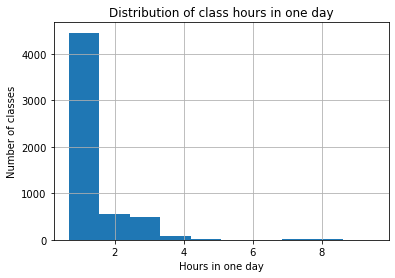

In [10]:
class_schedule.hist('daily_class_hours')
plt.title('Distribution of class hours in one day')
plt.xlabel('Hours in one day')
plt.ylabel('Number of classes')